In [49]:
import os
import numpy as np
#import statistics as stats
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model , metrics,discriminant_analysis , preprocessing , neighbors , cross_validation
from sklearn import utils , feature_selection , preprocessing , metrics , decomposition
%matplotlib inline
plt.style.use('ggplot')

In [50]:
#creating feature vector, from numpy 
X = np.random.normal(loc=0.0, scale=1.0, size=100)
epsilon = np.random.normal(loc=0.0, scale= .25, size=100)

In [51]:
# creating a Data frame with X and epsilon
df = pd.DataFrame({'X':X , 'epsilon':epsilon})

In [52]:
# Lets create a cubic featue matrix and coefficients randomly
# Beta_0 = .25
# Beta_1 = .30
# Beta_2 = .20
# Beta_3 = .1
# Beta_4 = .40
# Beta_5 = .05
# Beta_6 = .35
# Beta_7 = .45
# Beta_8 = .6
# Beta_9 = .55
# Beta_10 = .5



df['X_2'] = df.X**2
df['X_3'] = df.X**3
df['X_4'] = df.X**4
df['X_5'] = df.X**5
df['X_6'] = df.X**6
df['X_7'] = df.X**7
df['X_8'] = df.X**8
df['X_9'] = df.X**9
df['X_10'] = df.X**10





In [53]:
df['response'] = .25 + .30*(df.X) + .20*(df.X_2) + .1*(df.X_3) + .4*(df.X_4) + .05*(df.X_5) + .35*(df.X_6) + .45*(df.X_7) +.6*(df.X_8)+.55*(df.X_9)+.5*(df.X_10)


In [54]:
df.head()

,X,epsilon,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,response
0,-0.344300,0.373678,0.118542,-0.040814,0.014052,-0.004838,0.001666,-0.000574,0.000197,-6.798749e-05,2.340807e-05,0.172134
1,-1.051672,0.110923,1.106014,-1.163163,1.223266,-1.286474,1.352949,-1.422858,1.496379,-1.573700e+00,1.655016e+00,1.157414
2,-0.296447,-0.264340,0.087881,-0.026052,0.007723,-0.002289,0.000679,-0.000201,0.000060,-1.768163e-05,5.241664e-06,0.179187
3,-1.337622,-0.266462,1.789233,-2.393317,3.201354,-4.282202,5.727967,-7.661855,10.248667,-1.370884e+01,1.833725e+01,7.368575
4,-0.186520,0.633598,0.034790,-0.006489,0.001210,-0.000226,0.000042,-0.000008,0.000001,-2.732282e-07,5.096248e-08,0.200838


## plotting a pair plot

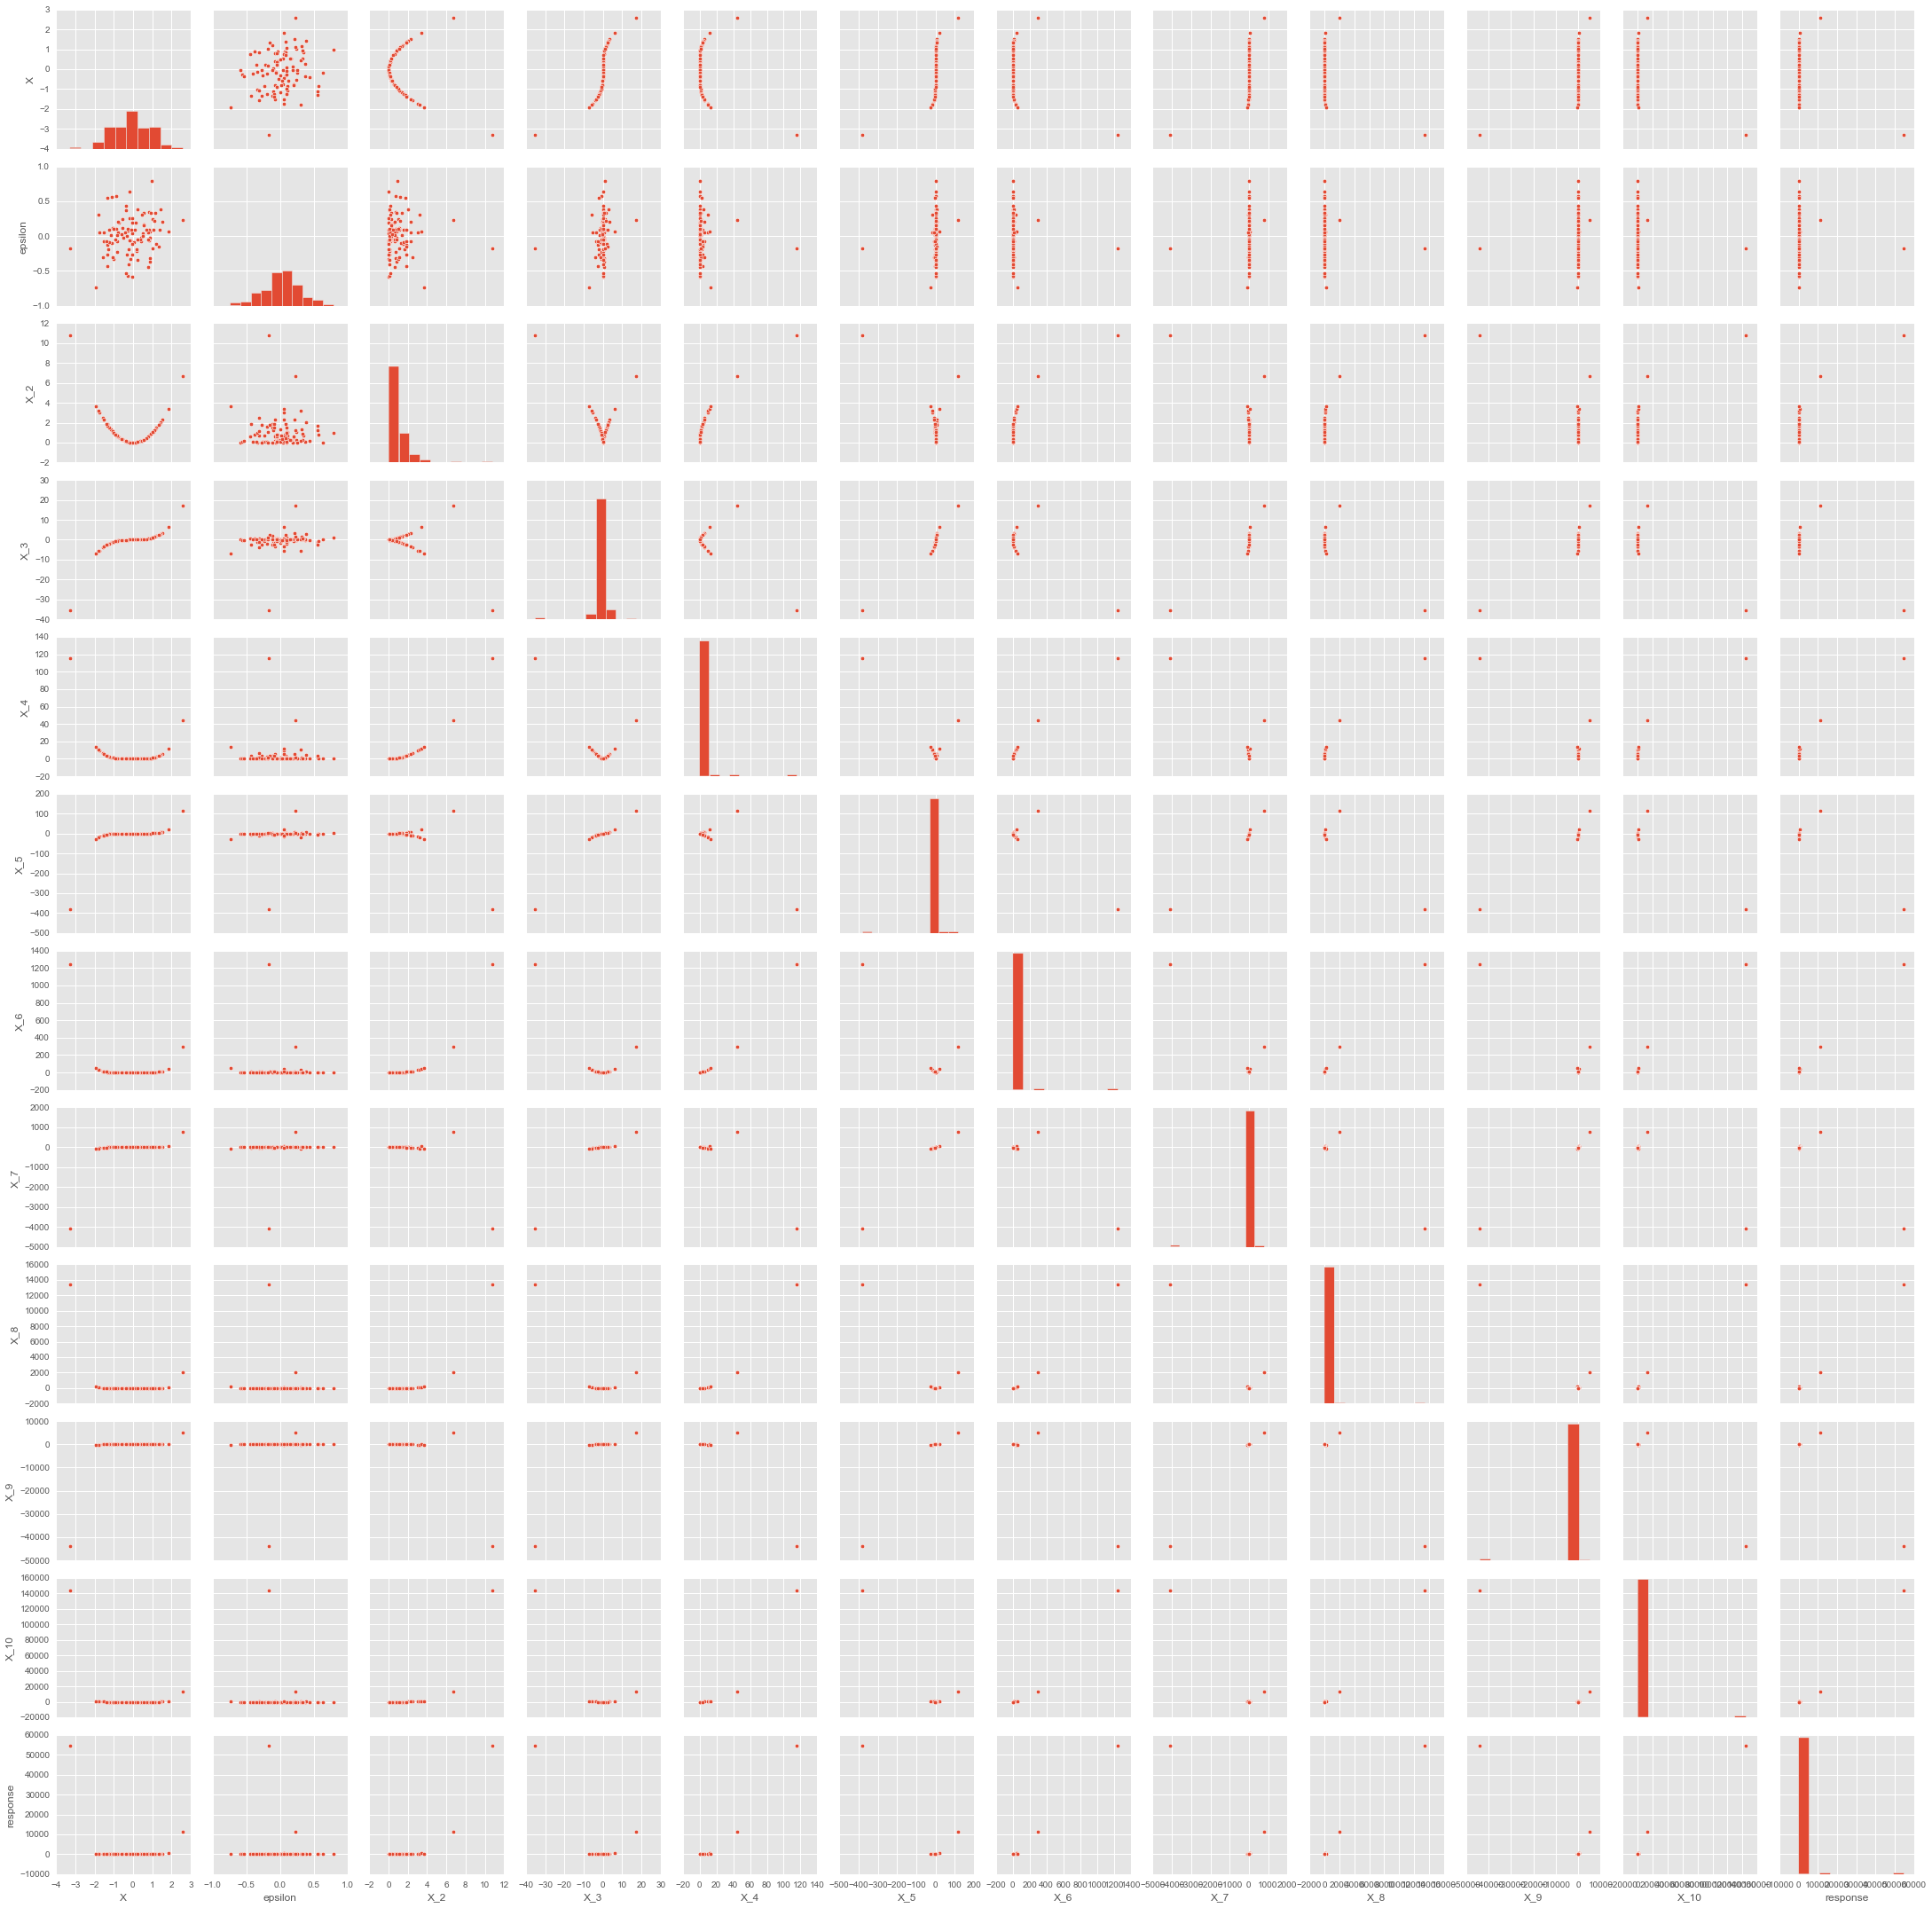

In [55]:
sns.pairplot(data = df)

In [56]:
X = df
X = X.drop('response' ,axis = 1)
y = df.response

In [57]:
y

0         0.172134
1         1.157414
2         0.179187
3         7.368575
4         0.200838
5         0.179514
6         4.742625
7         0.167016
8         1.355564
9         4.034713
10        0.206018
11        0.240753
12        1.681692
13        1.952361
14        0.340305
15        0.421789
16        0.536213
17        0.872785
18        0.385798
19        0.428333
20        0.405875
21       14.877444
22        1.820066
23    11216.369222
24        8.106478
25        0.163914
26       90.989155
27       54.910988
28        0.183244
29        0.263776
          ...     
70        1.181047
71        0.308092
72        0.331486
73        0.464065
74      231.998490
75        0.837025
76        1.146125
77       10.104258
78        0.300681
79        7.213337
80        0.559614
81        0.828460
82        0.194773
83        3.261896
84        0.232508
85        0.185922
86        0.199792
87        0.178484
88       32.186319
89        0.555102
90        0.345685
91        0.

# Experiment 1 - Best subset selection and trying to model a Linear regression

In [58]:
# Train Test split
train_X , test_X , train_y , test_y = cross_validation.train_test_split(X , y , test_size = .2)

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


In [75]:
len(train_X.columns)

11

In [86]:
train_X.columns[8]

'X_8'

In [62]:
# define a DATA Frame to hold the values and Lets Run through  loop and check the values of MSE and R^2
df_eval = pd.DataFrame({'Train_err':np.NAN , 'CV_err':np.nan , 'coeff':np.nan }, index = [0])

In [114]:
for i in range(1,len(train_X.columns)):
    # creating an empty list to hold the values of coeff
    coeff = []
#     print i
#     print coeff
    Kbest = feature_selection.SelectKBest(f_regression ,  k= i).fit(train_X , train_y)
    # to get the indices for the best parameters
    indices = Kbest.get_support()
    #print " The following predictors indices are getting selected %r " %indices
    # the below for loop checks the values for the indices returened ,if true append in the list else continue
    for j in range(0,len(train_X.columns)):
        if (indices[j]):
            print " The currrent value of index selected is- %r " %j
            
            print " The column value is --%r " %train_X.columns[j]
            coeff.append(train_X.columns[j])
        else:
            continue
        
        
    train_X_new = Kbest.fit_transform(train_X , train_y)
    regr = linear_model.LinearRegression()
    regr.fit(train_X_new , train_y)
    # Scoring on training Data
    train_score = regr.score(train_X_new , train_y)
    
    #Running and evaluating the CV score:
    cv_score = cross_validation.cross_val_score(regr, train_X_new,  train_y,scoring = 'r2',cv = 10).mean()
    
    # populating the Data Frame
    df_eval.loc[i-1 , 'Train_err'] = train_score
    df_eval.loc[i-1 , 'CV_err'] = cv_score
    print coeff 
    df_eval.loc[i-1 , 'coeff'] = ", ".join(str(x) for x in coeff)
    
    
    

 The currrent value of index selected is- 10 
 The column value is --'X_10' 
['X_10']
 The currrent value of index selected is- 8 
 The column value is --'X_8' 
 The currrent value of index selected is- 10 
 The column value is --'X_10' 
['X_8', 'X_10']
 The currrent value of index selected is- 8 
 The column value is --'X_8' 
 The currrent value of index selected is- 9 
 The column value is --'X_9' 
 The currrent value of index selected is- 10 
 The column value is --'X_10' 
['X_8', 'X_9', 'X_10']
 The currrent value of index selected is- 7 
 The column value is --'X_7' 
 The currrent value of index selected is- 8 
 The column value is --'X_8' 
 The currrent value of index selected is- 9 
 The column value is --'X_9' 
 The currrent value of index selected is- 10 
 The column value is --'X_10' 
['X_7', 'X_8', 'X_9', 'X_10']
 The currrent value of index selected is- 6 
 The column value is --'X_6' 
 The currrent value of index selected is- 7 
 The column value is --'X_7' 
 The currrent 

In [110]:
df_eval

,CV_err,Train_err,coeff
0,-85.462533,0.999962,X_10
1,-1.852739,0.999969,"X_8, X_10"
2,0.251503,1.000000,"X_8, X_9, X_10"
3,0.433139,1.000000,"X_7, X_8, X_9, X_10"
4,0.947651,1.000000,"X_6, X_7, X_8, X_9, X_10"
5,0.958385,1.000000,"X_5, X_6, X_7, X_8, X_9, X_10"
6,0.980170,1.000000,"X_4, X_5, X_6, X_7, X_8, X_9, X_10"
7,0.995143,1.000000,"X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10"
8,0.995919,1.000000,"X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10"
9,1.000000,1.000000,"X, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10"


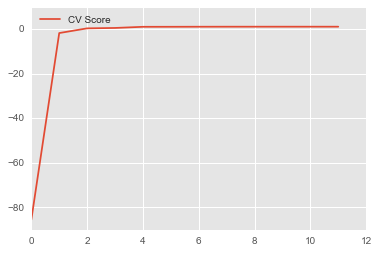

In [119]:
#plt.plot(df.response)

#plt.plot(df_eval.index , df_eval.Train_err , label = 'Train Score')
plt.plot(df_eval.index , df_eval.CV_err , label = 'CV Score')

plt.legend(loc='upper left')

plt.show()
#sns.pointplot(x = df_eval.index , y = df_eval.CV_err , data = df_eval)

Findings:
- Note that this is a kind of forward selection approach and X_10 is always included in the Model
- also the fit on the CV data suggests that model with parameter 1 &2 are useless as the R2 is negative.

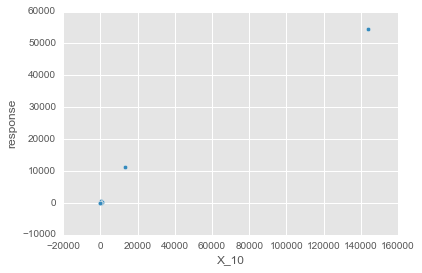

In [121]:
df[['response' , 'X_10']].plot(kind = 'scatter' , x= 'X_10' , y = 'response')

In [ ]:
# Lets take the 5 parameter model and see the Test set error
# As per the above , the best model would be the one that would contain the 5 featues - X_6 thru X_10


In [122]:
df.head()

,X,epsilon,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,response
0,-0.344300,0.373678,0.118542,-0.040814,0.014052,-0.004838,0.001666,-0.000574,0.000197,-6.798749e-05,2.340807e-05,0.172134
1,-1.051672,0.110923,1.106014,-1.163163,1.223266,-1.286474,1.352949,-1.422858,1.496379,-1.573700e+00,1.655016e+00,1.157414
2,-0.296447,-0.264340,0.087881,-0.026052,0.007723,-0.002289,0.000679,-0.000201,0.000060,-1.768163e-05,5.241664e-06,0.179187
3,-1.337622,-0.266462,1.789233,-2.393317,3.201354,-4.282202,5.727967,-7.661855,10.248667,-1.370884e+01,1.833725e+01,7.368575
4,-0.186520,0.633598,0.034790,-0.006489,0.001210,-0.000226,0.000042,-0.000008,0.000001,-2.732282e-07,5.096248e-08,0.200838


In [124]:
df_new =df[['X_6' , 'X_7' , 'X_8' , 'X_9' , 'X_10' , 'response']]

In [128]:
X_new = df.drop('response' ,axis =1)
y_new = df_new.response

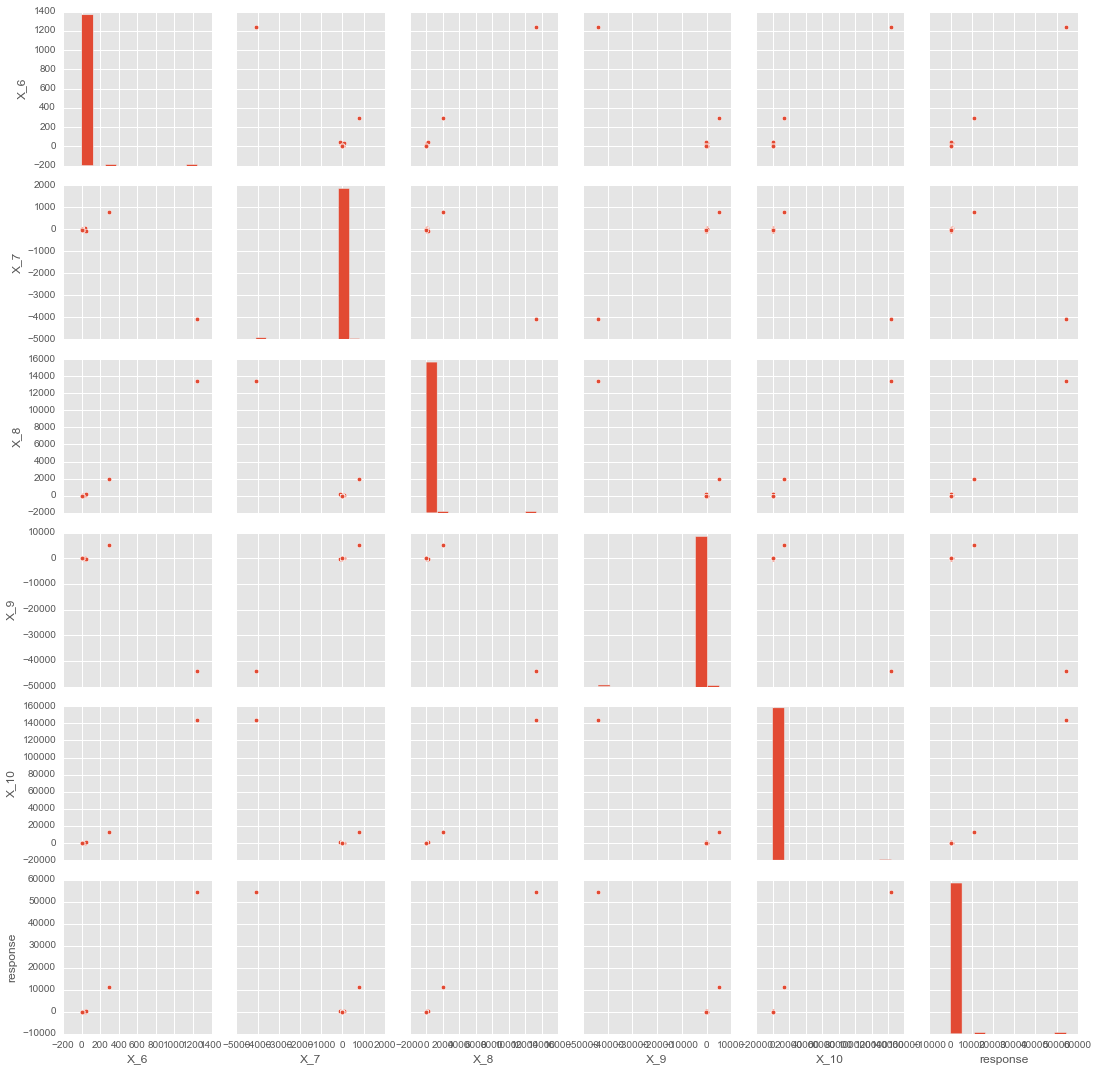

In [126]:
sns.pairplot(df_new)

- The pair plot indeed suggests that the relationship is linear

In [129]:
train_X_new , test_X_new , train_y_new , test_y_new = cross_validation.train_test_split(X_new , y_new , test_size = .2)

In [134]:
model = linear_model.LinearRegression().fit(train_X_new , train_y_new)
model.score(train_X_new , train_y_new)

1.0

- Suggests that it is a perfect fit


In [138]:
# Performing cross validation
cv_score = cross_validation.cross_val_score(model,train_X_new , train_y_new , scoring = 'r2' , cv= 10).mean()
print cv_score

1.0


In [141]:
# Predicing the test set error on a test set
y_hat = model.predict(test_X_new)
(y_hat - test_y_new).mean()

3.642752766097601e-13

Findings:
    -Extremely low test set error